In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


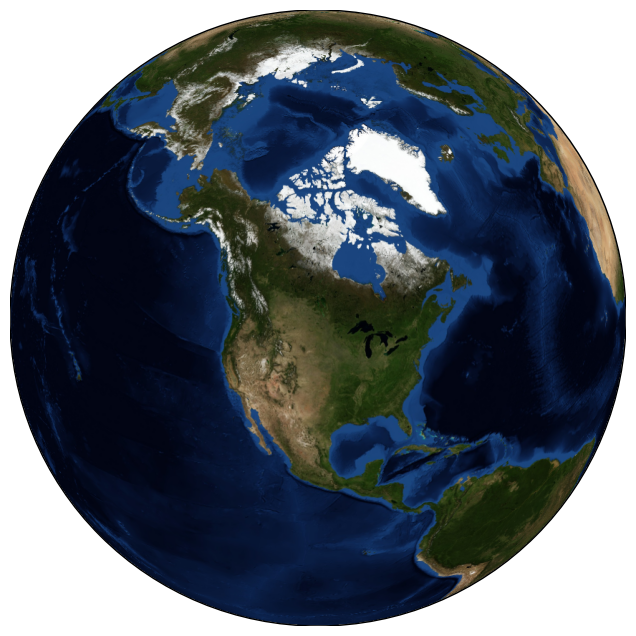

In [3]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


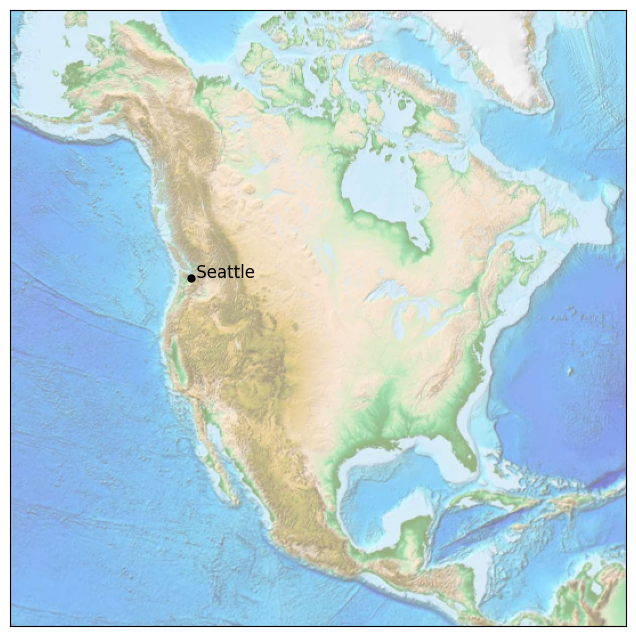

In [4]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

# Картографические проекции

В проекте Basemap представлены различные проекции. Для удобства мы определим базовую функцию для отрисовки карты с различными проекциями:

In [5]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

## Цилиндрические проекции

Далее в примере мы используем равнопромежуточную цилиндрическую проекцию, которая сохраняет расстояние между меридианами.

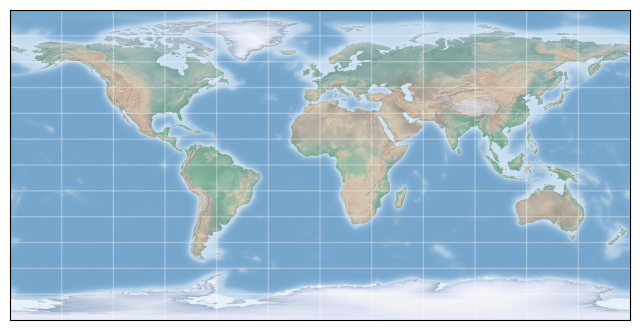

In [7]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='cyl',
    resolution=None,
    llcrnrlat=-90,
    urcrnrlat=90,
    llcrnrlon=-180,
    urcrnrlon=180
)
draw_map(m)

## Псевдоцилиндрические проекции

Псевдоцилиндрические проекции пытаются сохранить площади. На небольших участках измеренная по карте площадь соответствует реальной, чем больше участок для измерений, тем больше погрешность. Одна из такие проекций - это проекция Молвейда (Mollweide):

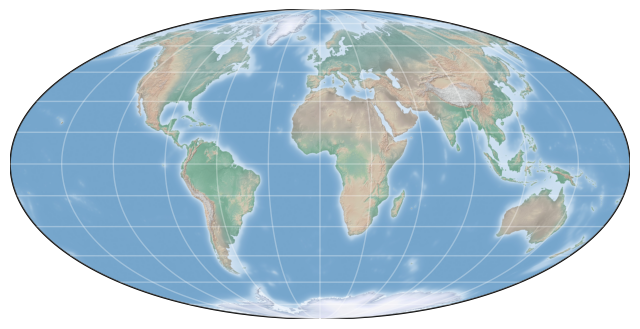

In [10]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

## Проекции с перспективой

Создают карты с видом из какой-либо точки в космосе. Например ортографическая проекция, которая показывает одну половину глобуса такой, какой она видна наблюдателю с большого расстояния.

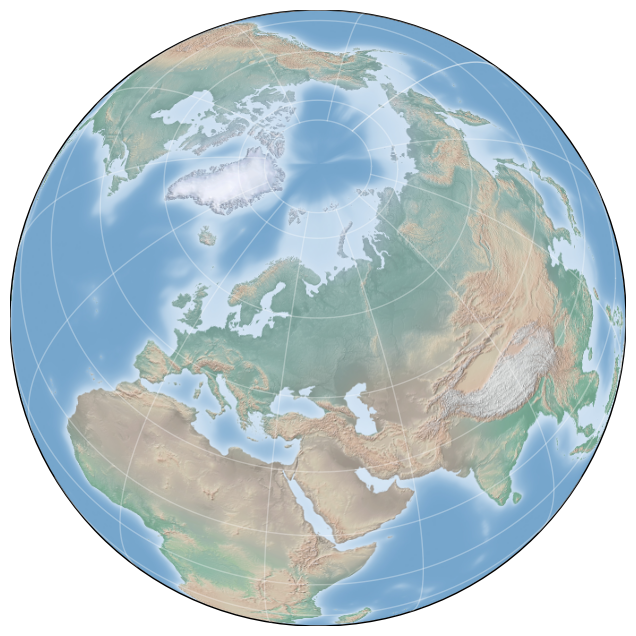

In [12]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=60, lon_0=40)
draw_map(m);

## Конические проекции

Проекция глобуса на конус, который затем раскрывается. Чем дальше от центральной части, тем больше искажения, но, в районе касательной конуса, карта имеет очень хорошую точность. Один из примеров коническая проекция Ламберта.

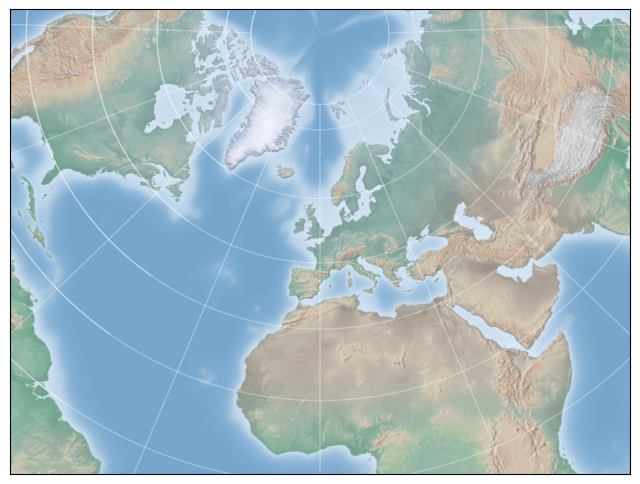

In [13]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='lcc',
    resolution=None,
    lon_0=0,
    lat_0=50,
    lat_1=45,
    lat_2=55,
    width=1.6E7,
    height=1.2E7
)
draw_map(m)

# Отрисовка фона карты

Ранее мы рассматривали методы `bluemarble()` и `shadedrelief()` для проекции изображений на карту, а также `drawparallels()` и `drawmeridians()`. Пакет Basemap содержит много полезные методов:

* **Физические границы и водные объекты**
    * `drawcoastlines()` - отрисовка береговой линии континентов
    * `drawlsmask()` - отрисовка маски между землей и водой, для проекции изображений на одно или другое
    * `drawmapboundary()` - отрисовка границы карты, включая цвет заполнения для океанов
    * `drawrivers()` - отрисовка рек
    * `fillcontinents()` - заполнение континентов заданным цветов

* **Политические границы**

    * `drawcountries()`: Draw country boundaries
    * `drawstates()`: Draw US state boundaries
    * `drawcounties()`: Draw US county boundaries

* **Map features**

    * `drawgreatcircle()`: Draw a great circle between two points
    * `drawparallels()`: Draw lines of constant latitude
    * `drawmeridians()`: Draw lines of constant longitude
    * `drawmapscale()`: Draw a linear scale on the map

* **Whole-globe images**

    * `bluemarble()`: Project NASA's blue marble image onto the map
    * `shadedrelief()`: Project a shaded relief image onto the map
    * `etopo()`: Draw an etopo relief image onto the map
    * `warpimage()`: Project a user-provided image onto the map

Далее пример отрисовки границ земли/океанов и эффект параметра разрешение:

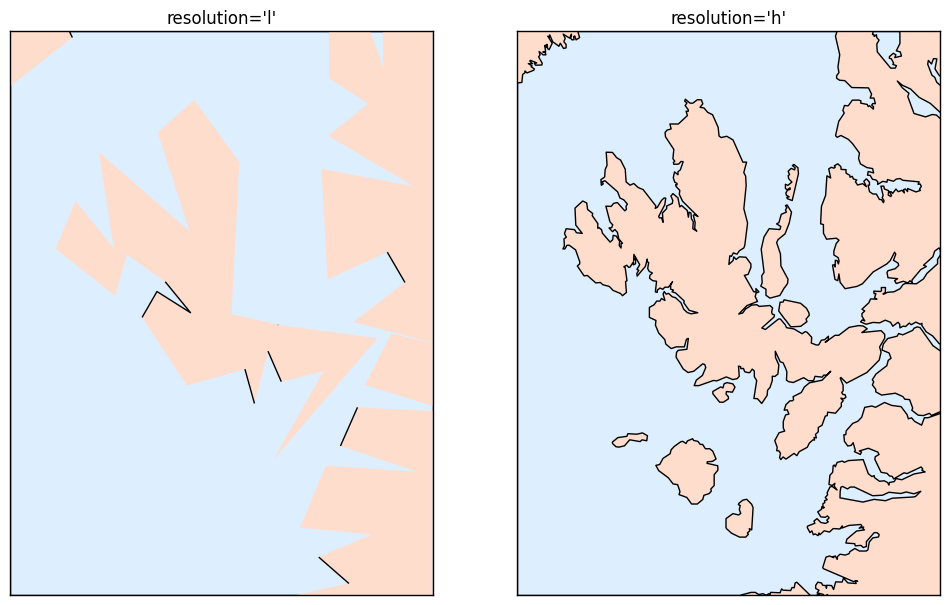

In [15]:
# Надо установить! 
# pip install basemap-data-hires
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(
        projection='gnom',
        lat_0=57.3,
        lon_0=-6.2,
        width=90000,
        height=120000,
        resolution=res,
        ax=ax[i]
    )
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

# Отрисовка данных на картах

На карты можно нанести различные данные, любая `plt` функция работает с картами. 

Некоторые методы для работы с картами:

    * `contour()`/`contourf()`: Draw contour lines or filled contours
    * `imshow()`: Draw an image
    * `pcolor()`/`pcolormesh()` : Draw a pseudocolor plot for irregular/regular meshes
    * `plot()`: Draw lines and/or markers.
    * `scatter()`: Draw points with markers.
    * `quiver()`: Draw vectors.
    * `barbs()`: Draw wind barbs.
    * `drawgreatcircle()`: Draw a great circle.


# Пример: города Калифорнии

Мы уже [показывали](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html) как использовать размер и цвет в разреженном графике для отображения информации о местоположении, размере и населении городов Калифорнии. Здесь мы рассмотрим как это сделать с помощью карты. Начнем с загрузки данных:

In [18]:
import pandas as pd
cities = pd.read_csv('notebooks_v1/data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

Далее мы зададим проекцию карты, нанесем данные и созданим цветовую шкалу с легендой:

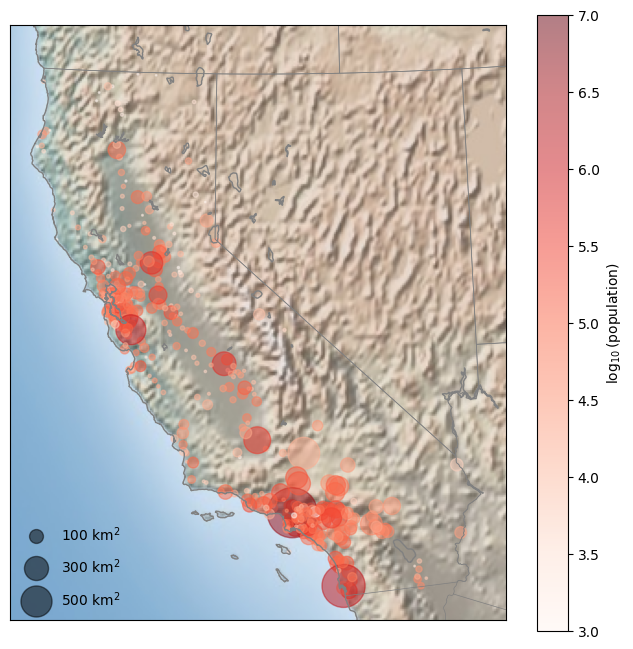

In [19]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=area, cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

# Пример: данные о температуре поверхности

In [23]:
!curl -O https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz
!gunzip gistemp250_GHCNv4.nc.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.7M  100 10.7M    0     0  1843k      0  0:00:05  0:00:05 --:--:-- 2431k


In [24]:
!pip install netcdf4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.5 MB/s eta 0:00:006.8 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


Читаем файл с данными:

In [26]:
from netCDF4 import Dataset
data = Dataset('gistemp250_GHCNv4.nc')

Возьмем данные с 15 января 2014 года:

In [27]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html#Example:-Surface-Temperature-Data